In [1]:
from pynq import Overlay
from pynq import allocate
import numpy as np
import matplotlib.pyplot as plt

ol = Overlay("dma.bit")

In [2]:
data_size = 1024

In [3]:
dma = ol.axi_dma

In [12]:
dma.register_map

RegisterMap {
  MM2S_DMACR = Register(RS=1, Reset=0, Keyhole=0, Cyclic_BD_Enable=0, IOC_IrqEn=0, Dly_IrqEn=0, Err_IrqEn=0, IRQThreshold=1, IRQDelay=0),
  MM2S_DMASR = Register(Halted=0, Idle=0, SGIncld=0, DMAIntErr=0, DMASlvErr=0, DMADecErr=0, SGIntErr=0, SGSlvErr=0, SGDecErr=0, IOC_Irq=0, Dly_Irq=0, Err_Irq=0, IRQThresholdSts=0, IRQDelaySts=0),
  MM2S_CURDESC = Register(Current_Descriptor_Pointer=0),
  MM2S_CURDESC_MSB = Register(Current_Descriptor_Pointer=0),
  MM2S_TAILDESC = Register(Tail_Descriptor_Pointer=0),
  MM2S_TAILDESC_MSB = Register(Tail_Descriptor_Pointer=0),
  MM2S_SA = Register(Source_Address=0),
  MM2S_SA_MSB = Register(Source_Address=0),
  MM2S_LENGTH = Register(Length=0),
  SG_CTL = Register(SG_CACHE=0, SG_USER=0),
  S2MM_DMACR = Register(RS=1, Reset=0, Keyhole=0, Cyclic_BD_Enable=0, IOC_IrqEn=0, Dly_IrqEn=0, Err_IrqEn=0, IRQThreshold=1, IRQDelay=0),
  S2MM_DMASR = Register(Halted=0, Idle=1, SGIncld=0, DMAIntErr=0, DMASlvErr=0, DMADecErr=0, SGIntErr=0, SGSlvErr=0, SG

In [4]:
dma_send = dma.sendchannel
dma_recv = dma.recvchannel

In [14]:

print("Output buffer address  :", hex(output_buffer.physical_address))
print("---")
print("DMA Source address     :", hex(dma.register_map.MM2S_SA.Source_Address))
print("DMA Destination address:", hex(dma.register_map.S2MM_DA.Destination_Address))

Output buffer address  : 0x18045000
---
DMA Source address     : 0x0
DMA Destination address: 0x18045000


In [5]:
output_buffer = allocate(shape=(data_size,), dtype=np.uint32)

In [9]:
dma_recv.transfer(output_buffer)
dma_recv.wait()

In [10]:
for i in range(data_size):
    output_buffer[i] &= 0x0FFF

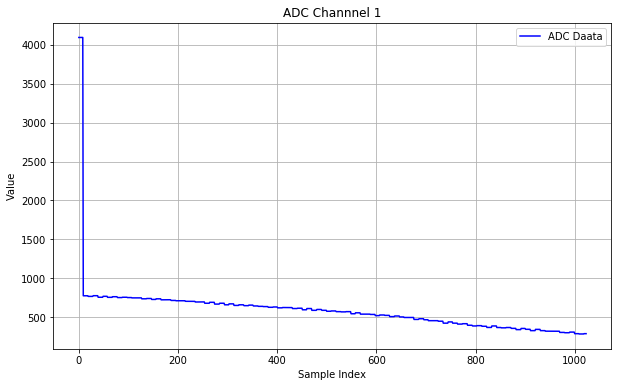

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(output_buffer, linestyle='-', color='b', label="ADC Daata")
plt.title("ADC Channnel 1")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()